### EDA

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv('D:\Đồ án\data\clean_data\data.csv', encoding='utf-8')

In [8]:
data.head()

,farm_id,province,farm_size_ha,crop_variety,crop_season,sowing_date,harvest_date,date,growth_stage,rain,...,soil_ec,water_level,soil_ph,disease_state,action,detail,days_since_treatment,yield_ton_per_ha,total_yield_ton,total_cost_vnd
0,FARM_0021E3,Bac Lieu,1.47,Đài Thơm 8,Thu đông 2010,2010-08-03,2010-10-22,2010-08-03,Ngoài mùa vụ,10.7,...,1.08,3.939,4.654,bình thường,không có,không có,0,6.49,9.54,1249500
1,FARM_0021E3,Bac Lieu,1.47,Đài Thơm 8,Thu đông 2010,2010-08-03,2010-10-22,2010-08-04,Ngoài mùa vụ,12.4,...,1.08,3.939,4.654,bình thường,không có,không có,0,6.49,9.54,1249500
2,FARM_0021E3,Bac Lieu,1.47,Đài Thơm 8,Thu đông 2010,2010-08-03,2010-10-22,2010-08-05,Ngoài mùa vụ,0.8,...,1.08,3.939,4.654,bình thường,không có,không có,0,6.49,9.54,1249500
3,FARM_0021E3,Bac Lieu,1.47,Đài Thơm 8,Thu đông 2010,2010-08-03,2010-10-22,2010-08-06,Ngoài mùa vụ,4.5,...,1.08,3.939,4.654,bình thường,không có,không có,0,6.49,9.54,1249500
4,FARM_0021E3,Bac Lieu,1.47,Đài Thơm 8,Thu đông 2010,2010-08-03,2010-10-22,2010-08-07,Ngoài mùa vụ,2.5,...,1.08,3.939,4.654,bình thường,không có,không có,0,6.49,9.54,1249500


In [9]:
data.duplicated().sum()

np.int64(0)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63577 entries, 0 to 63576
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   farm_id               63577 non-null  object 
 1   province              63577 non-null  object 
 2   farm_size_ha          63577 non-null  float64
 3   crop_variety          63577 non-null  object 
 4   crop_season           63577 non-null  object 
 5   sowing_date           63577 non-null  object 
 6   harvest_date          63577 non-null  object 
 7   date                  63577 non-null  object 
 8   growth_stage          63577 non-null  object 
 9   rain                  63577 non-null  float64
 10  min                   63577 non-null  int64  
 11  max                   63577 non-null  int64  
 12  humidi                63577 non-null  int64  
 13  wind                  63577 non-null  int64  
 14  cloud                 63577 non-null  int64  
 15  soil_moisture      

In [11]:
data.describe()

,farm_size_ha,rain,min,max,humidi,wind,cloud,soil_moisture,soil_nitrogen,soil_potassium,soil_organic,soil_ec,water_level,soil_ph,days_since_treatment,yield_ton_per_ha,total_yield_ton,total_cost_vnd
count,63577.000000,63577.000000,63577.000000,63577.000000,63577.000000,63577.000000,63577.000000,63577.000000,63577.000000,63577.000000,63577.000000,63577.00000,63577.000000,63577.000000,63577.000000,63577.000000,63577.000000,6.357700e+04
mean,1.814030,4.967296,24.589915,31.180930,75.014785,12.114900,39.017160,66.607260,0.169578,0.073187,2.331685,1.42123,8.207346,5.095196,5.455857,6.512447,11.841922,2.555272e+06
std,0.806264,9.445485,3.192875,3.987917,8.669683,4.803136,21.049737,27.590211,0.175912,0.055396,0.296087,0.61525,5.548953,0.715290,14.060588,0.701390,5.520321,2.018035e+06
min,0.500000,0.000000,4.000000,6.000000,30.000000,2.000000,0.000000,25.000000,0.050000,0.040000,1.800000,0.70500,1.000000,4.000000,0.000000,4.900000,3.000000,4.250000e+05
25%,1.270000,0.100000,24.000000,30.000000,69.000000,9.000000,23.000000,39.301000,0.050000,0.050000,2.068000,0.97500,2.622000,4.552000,0.000000,6.000000,8.070000,1.270000e+06
50%,1.630000,1.600000,25.000000,32.000000,75.000000,11.000000,36.000000,70.335000,0.050000,0.050000,2.348000,1.21500,7.120000,5.089000,0.000000,6.500000,10.480000,1.870000e+06
75%,2.140000,6.300000,26.000000,34.000000,81.000000,15.000000,52.000000,95.000000,0.303000,0.050000,2.608000,1.68300,15.000000,5.604000,0.000000,6.980000,14.210000,3.149400e+06
max,4.980000,466.000000,32.000000,43.000000,98.000000,46.000000,100.000000,95.000000,0.700000,0.337000,2.798000,3.04700,15.000000,6.754000,154.000000,7.990000,35.430000,1.363600e+07


In [12]:
data.describe(include=["object"])

,farm_id,province,crop_variety,crop_season,sowing_date,harvest_date,date,growth_stage,disease_state,action,detail
count,63577,63577,63577,63577,63577,63577,63577,63577,63577,63577,63577
unique,532,14,7,38,256,304,4534,5,4,6,24
top,FARM_25C69F,An Giang,KC06-1,Đông xuân 2018-2019,2019-11-02,2019-03-29,2018-11-18,Ngoài mùa vụ,bình thường,không có,không có
freq,304,8500,10354,2158,1152,719,17,47112,52036,61904,61904


In [13]:
data.isna().sum()

farm_id                 0
province                0
farm_size_ha            0
crop_variety            0
crop_season             0
sowing_date             0
harvest_date            0
date                    0
growth_stage            0
rain                    0
min                     0
max                     0
humidi                  0
wind                    0
cloud                   0
soil_moisture           0
soil_nitrogen           0
soil_potassium          0
soil_organic            0
soil_ec                 0
water_level             0
soil_ph                 0
disease_state           0
action                  0
detail                  0
days_since_treatment    0
yield_ton_per_ha        0
total_yield_ton         0
total_cost_vnd          0
dtype: int64

In [14]:
data.isna().mean() * 100

farm_id                 0.0
province                0.0
farm_size_ha            0.0
crop_variety            0.0
crop_season             0.0
sowing_date             0.0
harvest_date            0.0
date                    0.0
growth_stage            0.0
rain                    0.0
min                     0.0
max                     0.0
humidi                  0.0
wind                    0.0
cloud                   0.0
soil_moisture           0.0
soil_nitrogen           0.0
soil_potassium          0.0
soil_organic            0.0
soil_ec                 0.0
water_level             0.0
soil_ph                 0.0
disease_state           0.0
action                  0.0
detail                  0.0
days_since_treatment    0.0
yield_ton_per_ha        0.0
total_yield_ton         0.0
total_cost_vnd          0.0
dtype: float64

In [15]:
data.duplicated().sum()

np.int64(0)

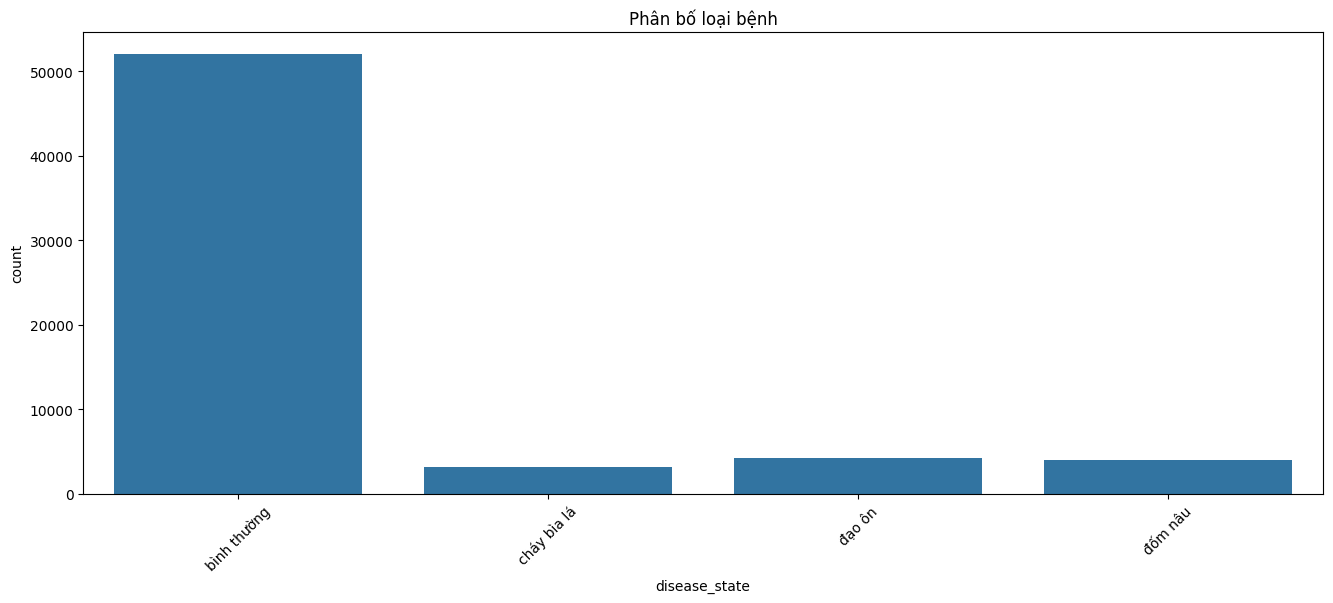

In [16]:
plt.figure(figsize=(16, 6))
sns.countplot(x="disease_state", data=data)
plt.title("Phân bố loại bệnh")
plt.xticks(rotation=45)
plt.show()

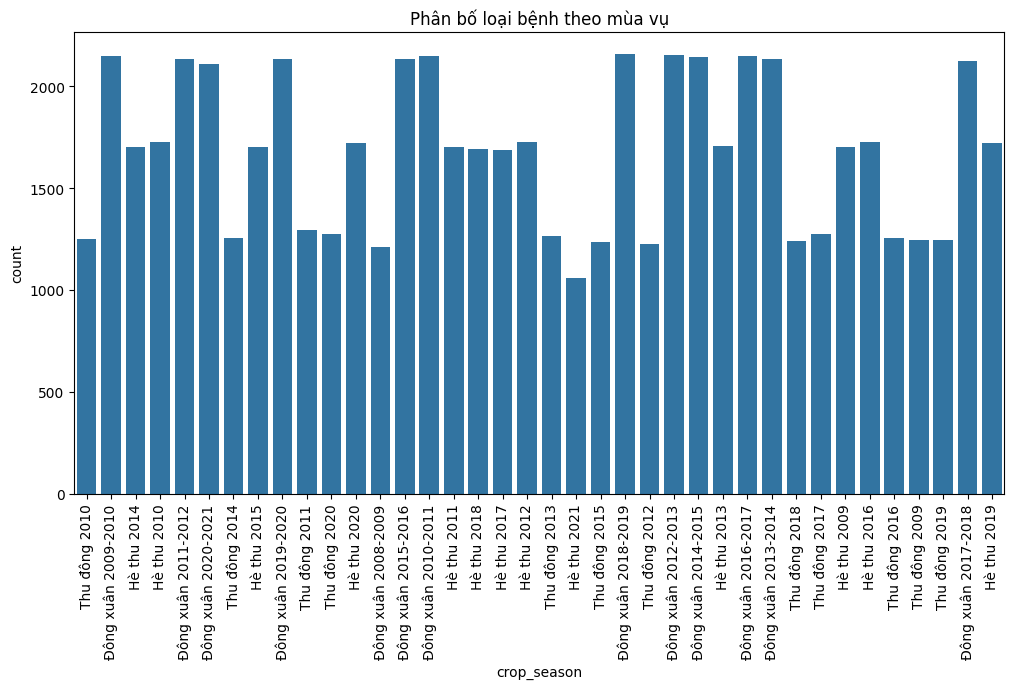

In [17]:
plt.figure(figsize=(12,6))
sns.countplot(x="crop_season", data=data)
plt.title("Phân bố loại bệnh theo mùa vụ")
plt.xticks(rotation=90)
plt.show()

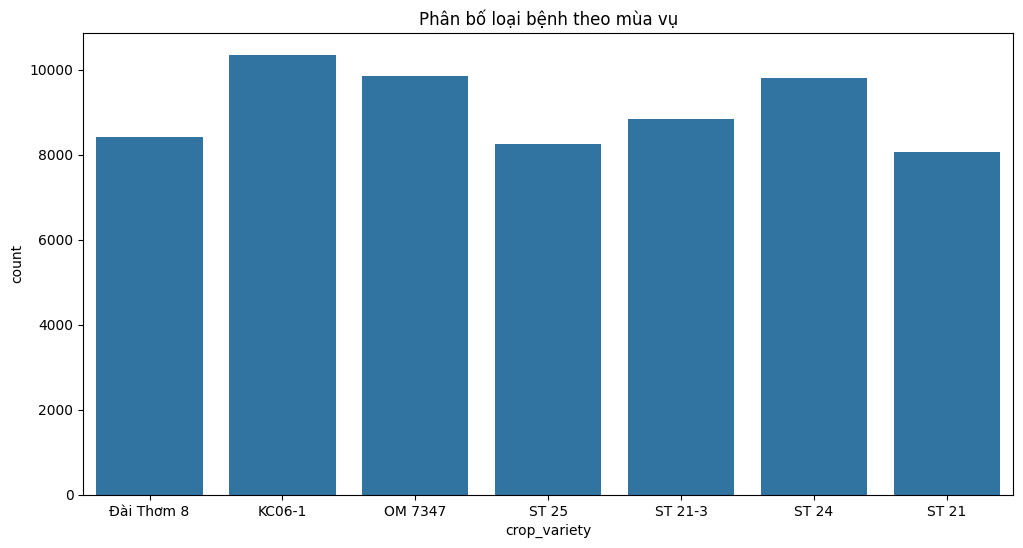

In [18]:
plt.figure(figsize=(12,6))
sns.countplot(x="crop_variety", data=data)
plt.title("Phân bố loại bệnh theo mùa vụ")
plt.xticks(rotation=0)
plt.show()

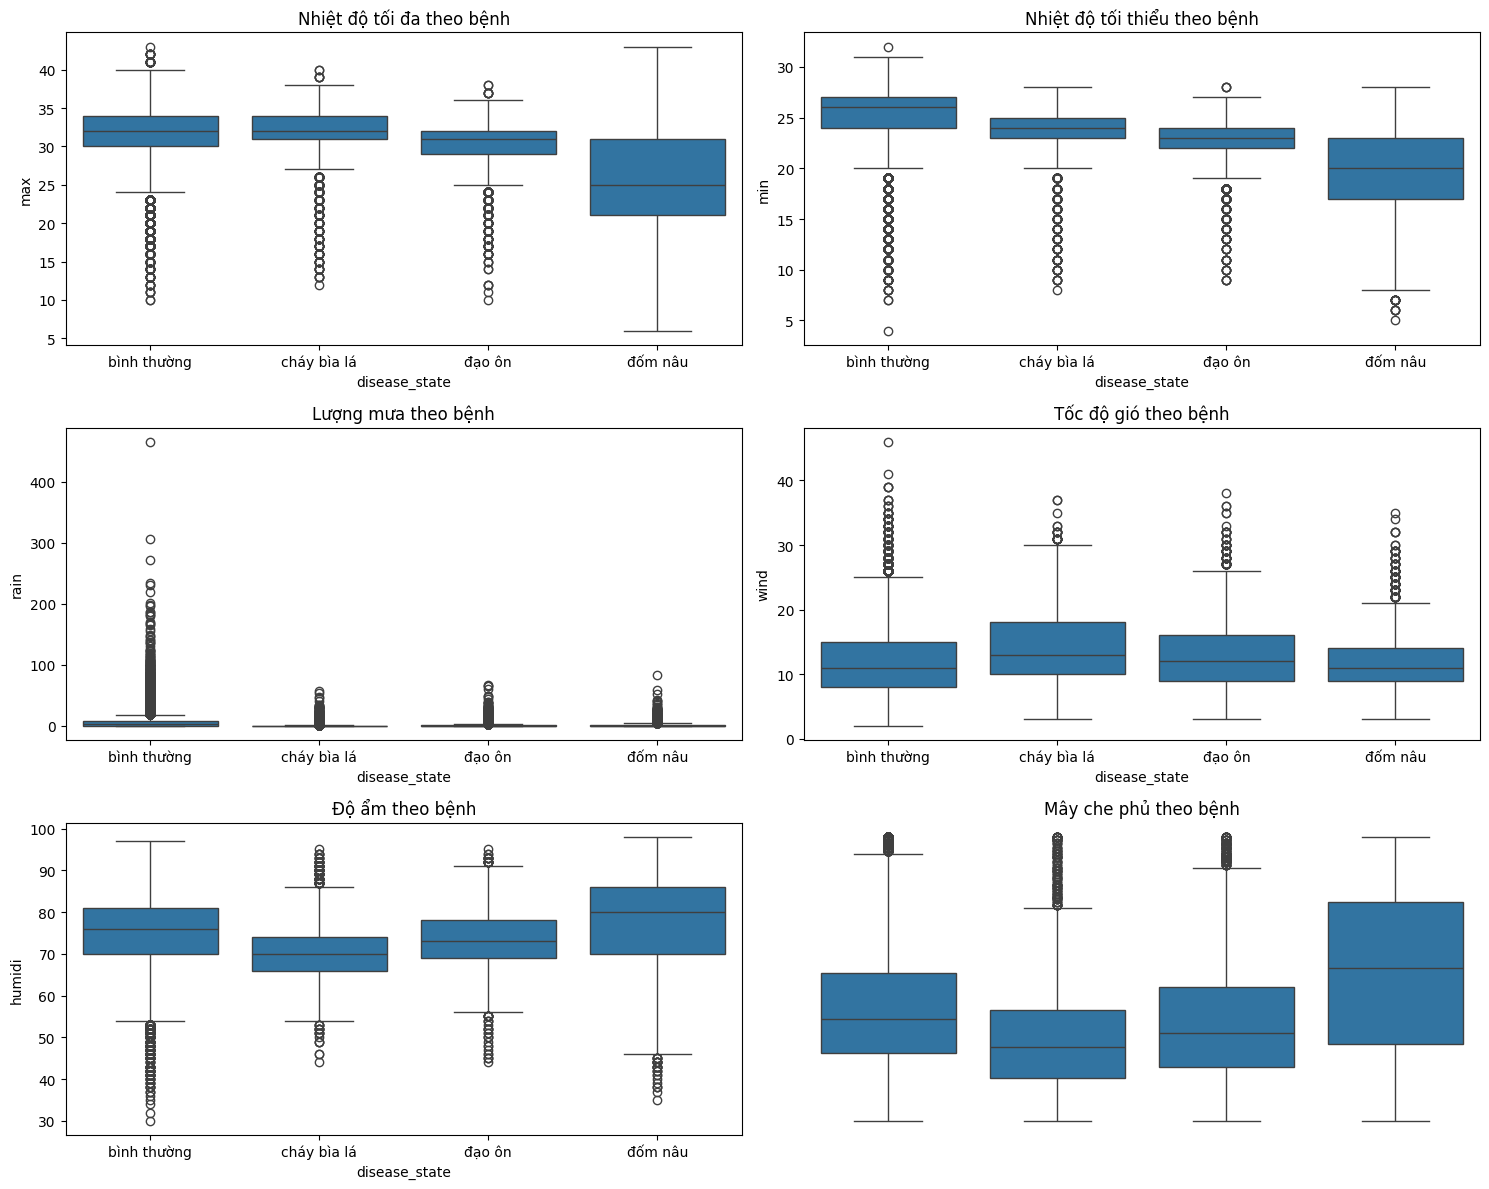

In [19]:
fig, axes = plt.subplots(3, 2, figsize=(15, 12))  

variables = [
    ('max', 'Nhiệt độ tối đa'),
    ('min', 'Nhiệt độ tối thiểu'),
    ('rain', 'Lượng mưa'),
    ('wind', 'Tốc độ gió'),
    ('humidi', 'Độ ẩm'),
    ('cloud', 'Mây che phủ')
]

for idx, (var, title) in enumerate(variables):
    row = idx // 2
    col = idx % 2
    sns.boxplot(x='disease_state', y=var, data=data, ax=axes[row, col])
    axes[row, col].set_title(f"{title} theo bệnh")
    axes[row, col].tick_params(axis='x')

axes[2, 1].axis('off')

plt.tight_layout()
plt.show()

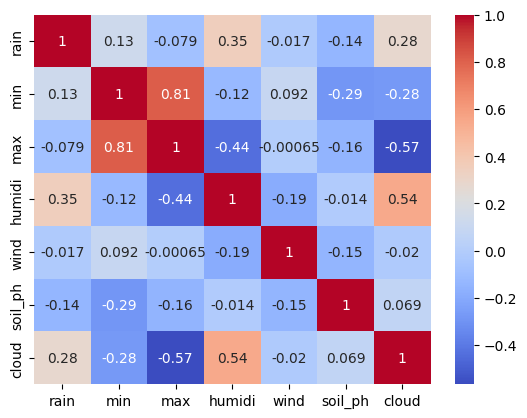

In [ ]:
corr = data[['rain','min','max','humidi','wind','soil_ph', 'cloud']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

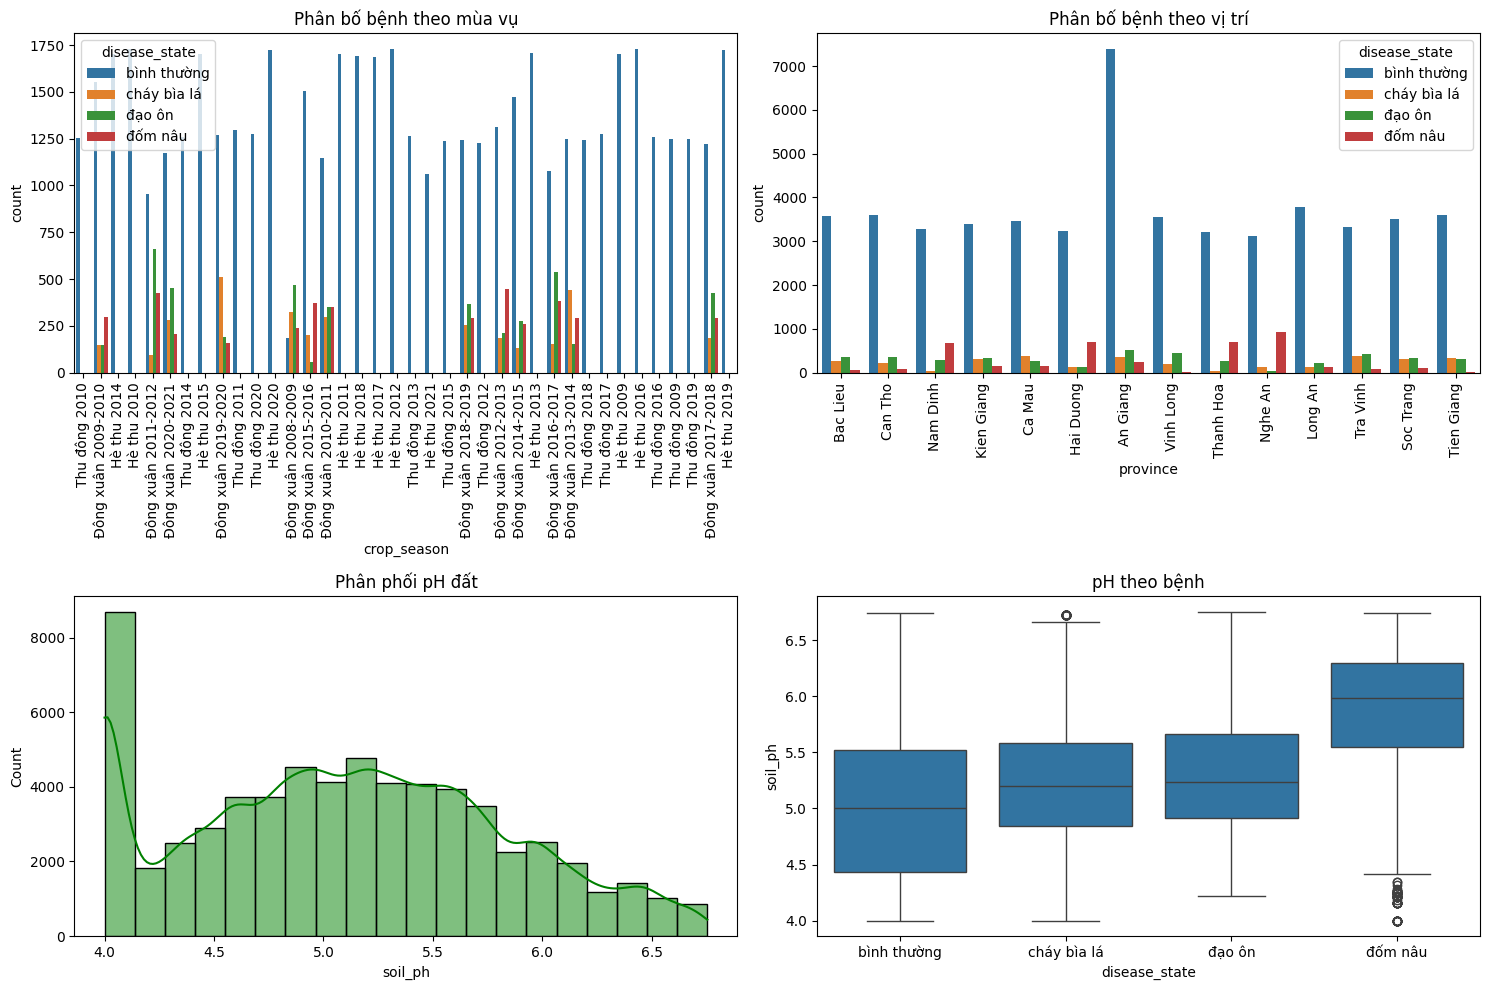

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.countplot(x="crop_season", hue="disease_state", data=data, ax=axes[0, 0])
axes[0, 0].set_title("Phân bố bệnh theo mùa vụ")
axes[0, 0].tick_params(axis='x', rotation=90)

sns.countplot(x="province", hue="disease_state", data=data, ax=axes[0, 1])
axes[0, 1].set_title("Phân bố bệnh theo vị trí")
axes[0, 1].tick_params(axis='x', rotation=90)

sns.histplot(data['soil_ph'], kde=True, ax=axes[1, 0], bins=20, color='green')
axes[1, 0].set_title("Phân phối pH đất")

sns.boxplot(x='disease_state', y='soil_ph', data=data, ax=axes[1, 1])
axes[1, 1].set_title("pH theo bệnh")
axes[1, 1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

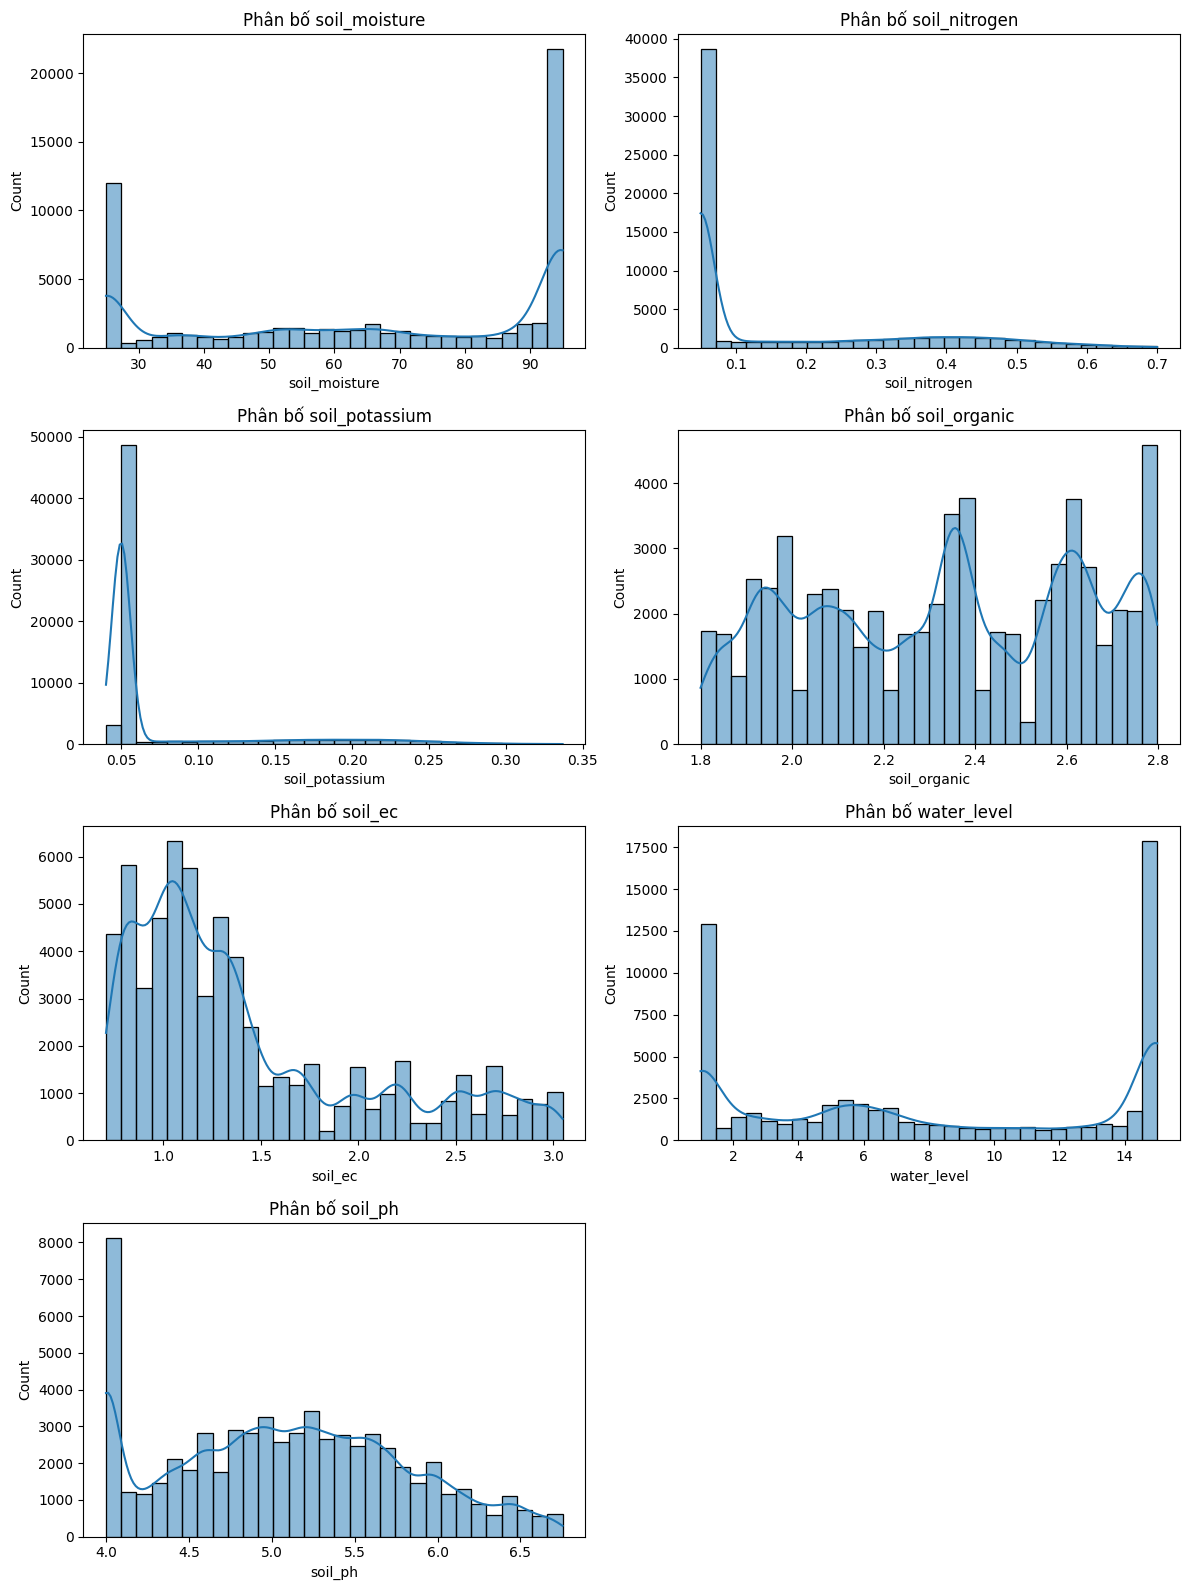

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

soil_cols = ['soil_moisture', 'soil_nitrogen', 'soil_potassium', 
             'soil_organic', 'soil_ec', 'water_level', 'soil_ph']

# Tạo figure với 4 hàng x 2 cột
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))
axes = axes.flatten()  # Chuyển về list 1D để duyệt dễ hơn

for i, col in enumerate(soil_cols):
    sns.histplot(data[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f"Phân bố {col}")

# Ẩn subplot thừa (ô thứ 8 vì ta có 7 biến)
for j in range(len(soil_cols), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

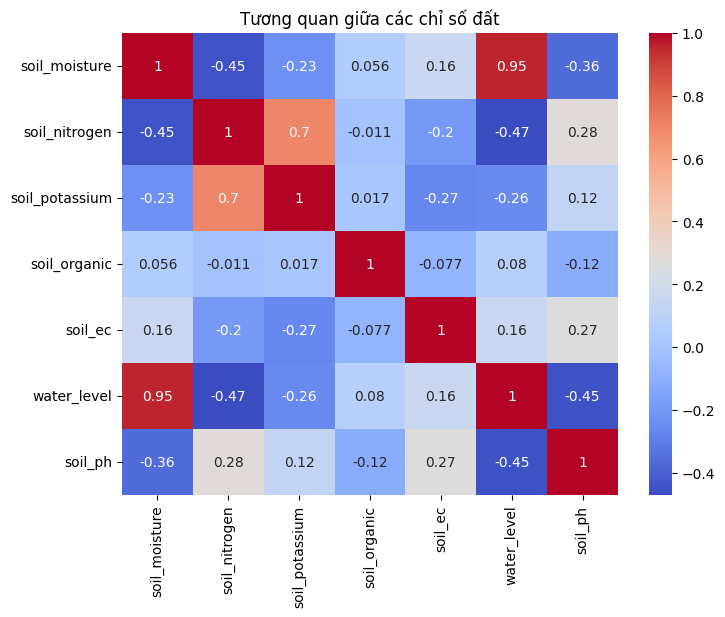

In [23]:
plt.figure(figsize=(8,6))
sns.heatmap(data[soil_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Tương quan giữa các chỉ số đất")
plt.show()

In [24]:
details_clean = data['detail'].dropna()

# Loại bỏ những câu không chứa thông tin
details_clean = details_clean[
    ~details_clean.str.lower().isin(['không có', 'không rõ chi tiết', ''])
]

In [25]:
details_clean

16       Thực hiện định kỳ theo giai đoạn cây
17       Thực hiện định kỳ theo giai đoạn cây
96       Thực hiện định kỳ theo giai đoạn cây
105      Thực hiện định kỳ theo giai đoạn cây
162                              gieo sạ thưa
                         ...                 
63244    Thực hiện định kỳ theo giai đoạn cây
63445    Thực hiện định kỳ theo giai đoạn cây
63446    Thực hiện định kỳ theo giai đoạn cây
63455    Thực hiện định kỳ theo giai đoạn cây
63456    Thực hiện định kỳ theo giai đoạn cây
Name: detail, Length: 1673, dtype: object

In [26]:
details_clean = details_clean.apply(lambda x: re.sub(r'[^\w\s]', '', x.lower()))

In [27]:
word_counts = Counter(" ".join(details_clean).split())
print(word_counts.most_common(20))  # Top 20 từ

[('cây', 1217), ('định', 1161), ('thực', 1140), ('hiện', 1140), ('kỳ', 1140), ('theo', 1140), ('giai', 1140), ('đoạn', 1140), ('phun', 156), ('thuốc', 124), ('bệnh', 109), ('hoặc', 75), ('gieo', 65), ('sạ', 65), ('cắt', 63), ('bỏ', 63), ('phân', 59), ('bón', 59), ('trừ', 55), ('nước', 53)]


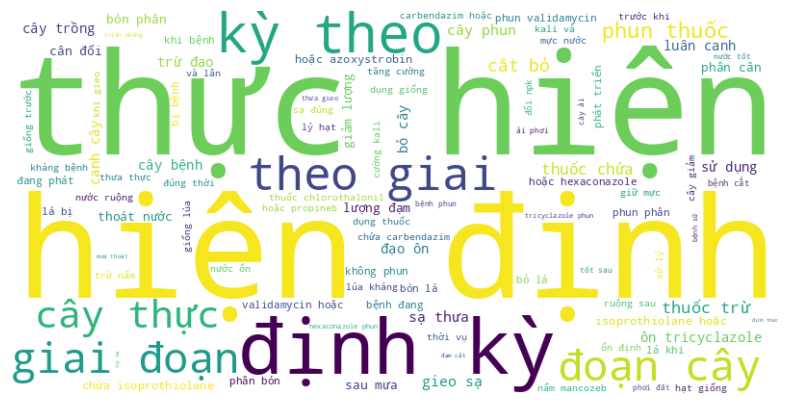

In [28]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(details_clean))

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

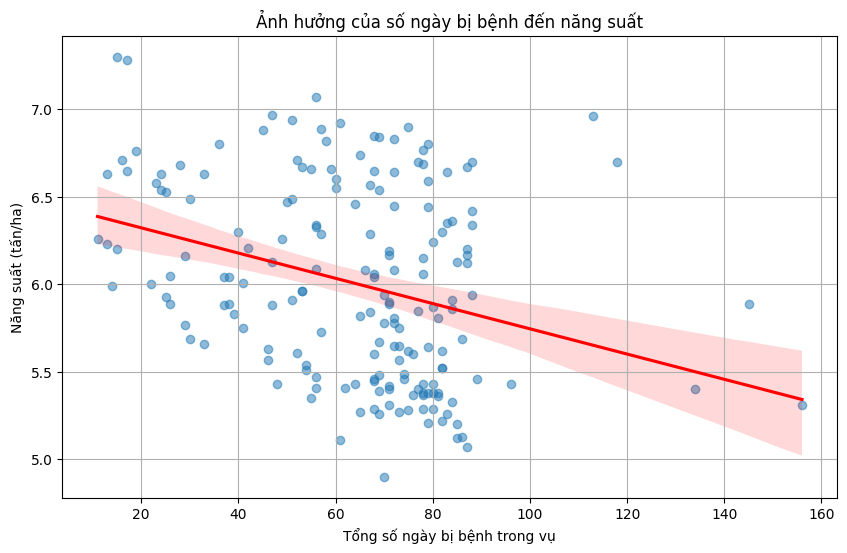

In [29]:
# Đếm số ngày bị bệnh cho mỗi nông trại
sick_days_per_farm = data[data['disease_state'] != 'bình thường'].groupby('farm_id').size().reset_index(name='sick_days')

# Lấy thông tin năng suất của mỗi nông trại
yield_per_farm = data.groupby('farm_id').first()[['yield_ton_per_ha']].reset_index()

# Gộp lại
impact_df = pd.merge(sick_days_per_farm, yield_per_farm, on='farm_id')

# Vẽ biểu đồ scatter plot
plt.figure(figsize=(10, 6))
sns.regplot(data=impact_df, x='sick_days', y='yield_ton_per_ha', 
            scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Ảnh hưởng của số ngày bị bệnh đến năng suất')
plt.xlabel('Tổng số ngày bị bệnh trong vụ')
plt.ylabel('Năng suất (tấn/ha)')
plt.grid(True)
plt.show()

### Build model predict disease base on environment data

In [32]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import joblib 

In [33]:
data = pd.read_csv('D:\Đồ án\data\clean_data\data.csv', encoding='utf-8')

In [34]:
data

,farm_id,province,farm_size_ha,crop_variety,crop_season,sowing_date,harvest_date,date,growth_stage,rain,...,soil_ec,water_level,soil_ph,disease_state,action,detail,days_since_treatment,yield_ton_per_ha,total_yield_ton,total_cost_vnd
0,FARM_0021E3,Bac Lieu,1.47,Đài Thơm 8,Thu đông 2010,2010-08-03,2010-10-22,2010-08-03,Ngoài mùa vụ,10.7,...,1.080,3.939,4.654,bình thường,không có,không có,0,6.49,9.54,1249500
1,FARM_0021E3,Bac Lieu,1.47,Đài Thơm 8,Thu đông 2010,2010-08-03,2010-10-22,2010-08-04,Ngoài mùa vụ,12.4,...,1.080,3.939,4.654,bình thường,không có,không có,0,6.49,9.54,1249500
2,FARM_0021E3,Bac Lieu,1.47,Đài Thơm 8,Thu đông 2010,2010-08-03,2010-10-22,2010-08-05,Ngoài mùa vụ,0.8,...,1.080,3.939,4.654,bình thường,không có,không có,0,6.49,9.54,1249500
3,FARM_0021E3,Bac Lieu,1.47,Đài Thơm 8,Thu đông 2010,2010-08-03,2010-10-22,2010-08-06,Ngoài mùa vụ,4.5,...,1.080,3.939,4.654,bình thường,không có,không có,0,6.49,9.54,1249500
4,FARM_0021E3,Bac Lieu,1.47,Đài Thơm 8,Thu đông 2010,2010-08-03,2010-10-22,2010-08-07,Ngoài mùa vụ,2.5,...,1.080,3.939,4.654,bình thường,không có,không có,0,6.49,9.54,1249500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63572,FARM_FFC786,An Giang,1.19,ST 24,Thu đông 2012,2012-08-08,2012-10-24,2012-10-22,Ngoài mùa vụ,3.1,...,1.729,15.000,4.000,bình thường,không có,không có,0,7.30,8.69,1011500
63573,FARM_FFC786,An Giang,1.19,ST 24,Thu đông 2012,2012-08-08,2012-10-24,2012-10-23,Ngoài mùa vụ,5.4,...,1.729,15.000,4.000,bình thường,không có,không có,0,7.30,8.69,1011500
63574,FARM_FFC786,An Giang,1.19,ST 24,Thu đông 2012,2012-08-08,2012-10-24,2012-10-23,Ngoài mùa vụ,3.5,...,1.729,15.000,4.000,bình thường,không có,không có,0,7.30,8.69,1011500
63575,FARM_FFC786,An Giang,1.19,ST 24,Thu đông 2012,2012-08-08,2012-10-24,2012-10-24,Ngoài mùa vụ,3.2,...,1.729,15.000,4.000,bình thường,không có,không có,0,7.30,8.69,1011500


In [36]:
features = [
    # Thời tiết
    'min', 'max', 'rain', 'wind', 'humidi',
    # Đất
    'soil_moisture', 'soil_nitrogen', 'soil_potassium',
    'soil_organic', 'soil_ec', 'water_level', 'soil_ph',
    # Vùng và mùa vụ
    'crop_season', 'province'
]

In [38]:
X = data[features]
y = data['disease_state']

In [40]:
le_crop_season = LabelEncoder()
le_province = LabelEncoder()

X['crop_season'] = le_crop_season.fit_transform(data['crop_season'])
X['province'] = le_province.fit_transform(data['province'])

# Lưu encoder để dùng lại
joblib.dump(le_crop_season, r"D:\Đồ án\model\label\crop_season_encoder.pkl")
joblib.dump(le_province, r"D:\Đồ án\model\label\province_encoder.pkl")

C:\Users\Danh\AppData\Local\Temp\ipykernel_28916\413247051.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['crop_season'] = le_crop_season.fit_transform(data['crop_season'])
C:\Users\Danh\AppData\Local\Temp\ipykernel_28916\413247051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['province'] = le_province.fit_transform(data['province'])


['D:\\Đồ án\\model\\label\\province_encoder.pkl']

In [41]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

c:\Users\Danh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [43]:
rf = RandomForestClassifier(
    n_estimators=300, max_depth=10, min_samples_split=5,
    min_samples_leaf=2, random_state=42
)
gb = GradientBoostingClassifier(n_estimators=200, max_depth=5, random_state=42)
xgb = XGBClassifier(n_estimators=300, max_depth=6, learning_rate=0.1, subsample=0.8, random_state=42)
svc = SVC(probability=True, kernel='rbf', C=1, gamma='scale', random_state=42)

In [44]:
voting_clf = VotingClassifier(
    estimators=[('rf', rf), ('gb', gb), ('xgb', xgb), ('svc', svc)],
    voting='soft'
)

In [45]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=10,
                                                     min_samples_leaf=2,
                                                     min_samples_split=5,
                                                     n_estimators=300,
                                                     random_state=42)),
                             ('gb',
                              GradientBoostingClassifier(max_depth=5,
                                                         n_estimators=200,
                                                         random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytre...
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=6,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=300, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                             ('svc',
                              SVC(C=1, probability=True, random_state=42))],
                 voting='soft')

In [46]:
y_pred = voting_clf.predict(X_test)

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

 bình thường       1.00      0.95      0.98     10318
 cháy bìa lá       0.95      0.98      0.96     10509
      đạo ôn       0.96      0.98      0.97     10412
     đốm nâu       0.98      0.98      0.98     10390

    accuracy                           0.97     41629
   macro avg       0.97      0.97      0.97     41629
weighted avg       0.97      0.97      0.97     41629



In [49]:
joblib.dump(voting_clf, r"D:\Đồ án\model\disease_predictor.pkl")

['D:\\Đồ án\\model\\disease_predictor.pkl']

In [50]:
loaded_model = joblib.load(r"D:\Đồ án\model\disease_predictor.pkl")

In [51]:
y_pred = loaded_model.predict(X_test)

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

 bình thường       1.00      0.95      0.98     10318
 cháy bìa lá       0.95      0.98      0.96     10509
      đạo ôn       0.96      0.98      0.97     10412
     đốm nâu       0.98      0.98      0.98     10390

    accuracy                           0.97     41629
   macro avg       0.97      0.97      0.97     41629
weighted avg       0.97      0.97      0.97     41629



In [53]:
# Load encoder đã lưu
le_crop_season = joblib.load(r"D:\Đồ án\model\label\crop_season_encoder.pkl")
le_province = joblib.load(r"D:\Đồ án\model\label\province_encoder.pkl")

# Mẫu dữ liệu mới
sample_data = pd.DataFrame([{
    'min': 25.0,
    'max': 33.0,
    'rain': 5.0,
    'wind': 15.0,
    'humidi': 85.0,
    'soil_moisture': 40.0,
    'soil_nitrogen': 0.12,
    'soil_potassium': 0.10,
    'soil_organic': 1.5,
    'soil_ec': 0.5,
    'water_level': 10.0,
    'soil_ph': 6.5,
    'crop_season': 'Hè thu 2009',
    'province': 'An Giang'
}])

# Encode lại giống như khi train
sample_data['crop_season'] = le_crop_season.transform(sample_data['crop_season'])
sample_data['province'] = le_province.transform(sample_data['province'])

# Dự đoán
prediction = voting_clf.predict(sample_data)
print("Dự đoán bệnh:", prediction[0])
proba = voting_clf.predict_proba(sample_data)
print("Xác suất dự đoán:", proba)

Dự đoán bệnh: bình thường
Xác suất dự đoán: [[0.91682779 0.03799908 0.02288604 0.02228709]]


### Build model predict progress

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import numpy as np
import os

In [2]:
data = pd.read_csv('D:\Đồ án\data\clean_data\data.csv', encoding='utf-8')

In [3]:
data.columns

Index(['farm_id', 'province', 'farm_size_ha', 'crop_variety', 'crop_season',
       'sowing_date', 'harvest_date', 'date', 'growth_stage', 'rain', 'min',
       'max', 'humidi', 'wind', 'cloud', 'soil_moisture', 'soil_nitrogen',
       'soil_potassium', 'soil_organic', 'soil_ec', 'water_level', 'soil_ph',
       'disease_state', 'action', 'detail', 'days_since_treatment',
       'yield_ton_per_ha', 'total_yield_ton', 'total_cost_vnd'],
      dtype='object')

In [4]:
data

,farm_id,province,farm_size_ha,crop_variety,crop_season,sowing_date,harvest_date,date,growth_stage,rain,...,soil_ec,water_level,soil_ph,disease_state,action,detail,days_since_treatment,yield_ton_per_ha,total_yield_ton,total_cost_vnd
0,FARM_0021E3,Bac Lieu,1.47,Đài Thơm 8,Thu đông 2010,2010-08-03,2010-10-22,2010-08-03,Ngoài mùa vụ,10.7,...,1.080,3.939,4.654,bình thường,không có,không có,0,6.49,9.54,1249500
1,FARM_0021E3,Bac Lieu,1.47,Đài Thơm 8,Thu đông 2010,2010-08-03,2010-10-22,2010-08-04,Ngoài mùa vụ,12.4,...,1.080,3.939,4.654,bình thường,không có,không có,0,6.49,9.54,1249500
2,FARM_0021E3,Bac Lieu,1.47,Đài Thơm 8,Thu đông 2010,2010-08-03,2010-10-22,2010-08-05,Ngoài mùa vụ,0.8,...,1.080,3.939,4.654,bình thường,không có,không có,0,6.49,9.54,1249500
3,FARM_0021E3,Bac Lieu,1.47,Đài Thơm 8,Thu đông 2010,2010-08-03,2010-10-22,2010-08-06,Ngoài mùa vụ,4.5,...,1.080,3.939,4.654,bình thường,không có,không có,0,6.49,9.54,1249500
4,FARM_0021E3,Bac Lieu,1.47,Đài Thơm 8,Thu đông 2010,2010-08-03,2010-10-22,2010-08-07,Ngoài mùa vụ,2.5,...,1.080,3.939,4.654,bình thường,không có,không có,0,6.49,9.54,1249500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63572,FARM_FFC786,An Giang,1.19,ST 24,Thu đông 2012,2012-08-08,2012-10-24,2012-10-22,Ngoài mùa vụ,3.1,...,1.729,15.000,4.000,bình thường,không có,không có,0,7.30,8.69,1011500
63573,FARM_FFC786,An Giang,1.19,ST 24,Thu đông 2012,2012-08-08,2012-10-24,2012-10-23,Ngoài mùa vụ,5.4,...,1.729,15.000,4.000,bình thường,không có,không có,0,7.30,8.69,1011500
63574,FARM_FFC786,An Giang,1.19,ST 24,Thu đông 2012,2012-08-08,2012-10-24,2012-10-23,Ngoài mùa vụ,3.5,...,1.729,15.000,4.000,bình thường,không có,không có,0,7.30,8.69,1011500
63575,FARM_FFC786,An Giang,1.19,ST 24,Thu đông 2012,2012-08-08,2012-10-24,2012-10-24,Ngoài mùa vụ,3.2,...,1.729,15.000,4.000,bình thường,không có,không có,0,7.30,8.69,1011500


In [5]:
data['disease_state'].value_counts()

disease_state
bình thường    52036
đạo ôn          4306
đốm nâu         4025
cháy bìa lá     3210
Name: count, dtype: int64

In [6]:
data['date'] = pd.to_datetime(data['date'])
data = data.sort_values(["farm_id", "date"]).reset_index(drop=True)

In [7]:
data['sowing_date'] = pd.to_datetime(data['sowing_date'])
data['days_since_sowing'] = (data['date'] - data['sowing_date']).dt.days

In [8]:
numeric_cols = ['rain', 'min', 'max', 'humidi', 'wind', 'cloud', 'soil_moisture', 'soil_nitrogen', 'soil_ph']
windows = [3, 7]

In [9]:
for col in numeric_cols:
    for w in windows:
        data[f'{col}_mean_{w}d'] = data.groupby('farm_id')[col].transform(
            lambda x: x.rolling(window=w, min_periods=1).mean()
        )
        if col == 'rain':
            data[f'{col}_sum_{w}d'] = data.groupby('farm_id')[col].transform(
                lambda x: x.rolling(window=w, min_periods=1).sum()
            )

In [10]:
def get_future_disease_corrected(series):
    labels = []
    series_len = len(series)
    
    def decide_label(disease_set):
        disease_set.discard('bình thường')
        if not disease_set:
            return 'bình thường'
        return sorted(list(disease_set))[0]

    for i in range(series_len):
        future_window = series.iloc[i + 1 : i + 8]
        if future_window.empty:
            labels.append(None)
            continue
        disease_set = set(future_window)
        labels.append(decide_label(disease_set))
        
    return pd.Series(labels, index=series.index)

In [11]:
print("Tạo biến mục tiêu y (target variable)...")
data['target_disease_7d'] = data.groupby('farm_id')['disease_state'].transform(get_future_disease_corrected)

data.dropna(subset=['target_disease_7d'], inplace=True)
data = data.reset_index(drop=True)

print("Hoàn thành Feature Engineering!")

Tạo biến mục tiêu y (target variable)...
Hoàn thành Feature Engineering!


In [12]:
features = [col for col in data.columns if '_mean_' in col or '_sum_' in col]
features += ['days_since_sowing', 'days_since_treatment']
categorical_features = ['province', 'crop_variety', 'growth_stage'] 
features += categorical_features

In [13]:
X = data[features]
y = data['target_disease_7d']

In [14]:
y.value_counts()

target_disease_7d
bình thường    49688
đạo ôn          4980
đốm nâu         4376
cháy bìa lá     4001
Name: count, dtype: int64

In [15]:
le_y = LabelEncoder()
y_encoded = le_y.fit_transform(y)

In [16]:
class_names = le_y.classes_
print("Các lớp mục tiêu:", class_names)

Các lớp mục tiêu: ['bình thường' 'cháy bìa lá' 'đạo ôn' 'đốm nâu']


In [17]:
X_encoded = X.copy()
label_encoders_X = {} # Tạo một dictionary để lưu encoder cho mỗi cột

for col in categorical_features:
    print(f"Mã hóa cột: {col}")
    le_x = LabelEncoder()
    X_encoded[col] = le_x.fit_transform(X_encoded[col])
    label_encoders_X[col] = le_x

Mã hóa cột: province
Mã hóa cột: crop_variety
Mã hóa cột: growth_stage


In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

In [19]:
print(f"Kích thước tập train ban đầu: {X_train.shape}")
print(f"Kích thước tập test: {X_test.shape}")

Kích thước tập train ban đầu: (50436, 25)
Kích thước tập test: (12609, 25)


In [20]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

c:\Users\Danh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [21]:
unique, counts = np.unique(y_train_resampled, return_counts=True)
print(dict(zip(le_y.inverse_transform(unique), counts)))

{'bình thường': np.int64(39750), 'cháy bìa lá': np.int64(39750), 'đạo ôn': np.int64(39750), 'đốm nâu': np.int64(39750)}


In [22]:
model = XGBClassifier(objective='multi:softmax', 
                      num_class=len(class_names), 
                      use_label_encoder=False,  
                      eval_metric='mlogloss',
                      random_state=42)

model.fit(X_train_resampled, y_train_resampled)

c:\Users\Danh\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [14:14:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=4, num_parallel_tree=None, ...)


Đánh giá hiệu suất mô hình trên tập test...

Classification Report:
              precision    recall  f1-score   support

 bình thường       1.00      0.98      0.99      9938
 cháy bìa lá       0.89      0.96      0.92       800
      đạo ôn       0.92      0.95      0.93       996
     đốm nâu       0.93      0.97      0.95       875

    accuracy                           0.98     12609
   macro avg       0.93      0.97      0.95     12609
weighted avg       0.98      0.98      0.98     12609

Confusion Matrix:


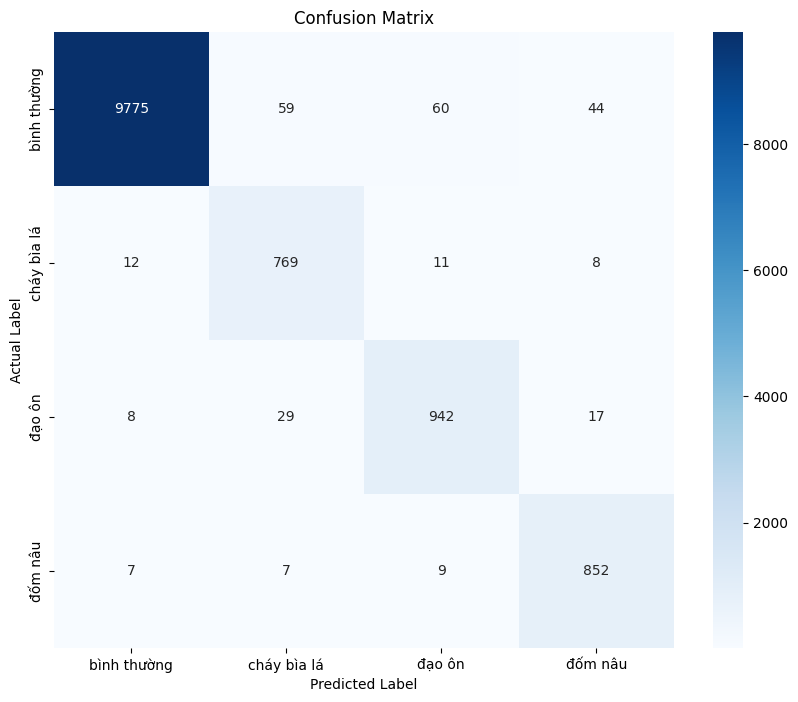

In [23]:
print("\nĐánh giá hiệu suất mô hình trên tập test...")
y_pred = model.predict(X_test)

# In báo cáo phân loại (classification report)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

# Vẽ ma trận nhầm lẫn (confusion matrix)
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [24]:
import joblib

In [25]:
feature_names = X_encoded.columns.tolist()

In [26]:
saved_objects = {
    'model': model,
    'label_encoders_X': label_encoders_X,
    'label_encoder_y': le_y,
    'feature_names': feature_names,
    'class_names': class_names.tolist()
}

In [27]:
folder_path = r'D:\Đồ án\model'
file_name = 'rice_disease_predictor.joblib'
full_path = os.path.join(folder_path, file_name)

In [28]:
joblib.dump(saved_objects, full_path)

['D:\\Đồ án\\model\\rice_disease_predictor.joblib']

In [31]:
import joblib
import pandas as pd
import numpy as np

# 1. TẢI LẠI CÁC ĐỐI TƯỢNG ĐÃ LƯU 📂
file_path = r'D:\Đồ án\model\rice_disease_predictor.joblib'
loaded_objects = joblib.load(file_path)

# Tách các đối tượng ra các biến riêng để dễ sử dụng
loaded_model = loaded_objects['model']
# SỬA LỖI KEY: Kiểm tra key chính xác khi lưu
# Giả sử bạn đã lưu label encoders cho các cột X dưới key 'label_encoders_X'
loaded_encoders_X = loaded_objects.get('label_encoders_X', {}) 
loaded_encoder_y = loaded_objects['label_encoder_y']
loaded_feature_names = loaded_objects['feature_names']
loaded_class_names = loaded_objects['class_names']

print("✅ Đã tải lại mô hình và các đối tượng thành công!")

# 2. TẠO MỘT KỊCH BẢN RỦI RO CAO (DỄ BỊ BỆNH) 📝
high_risk_data_point = {
    # TĂNG CAO: Mưa lớn và liên tục trong những ngày gần đây
    'rain_mean_3d': 15.0,
    'rain_sum_3d': 45.0,
    'rain_mean_7d': 12.5,
    'rain_sum_7d': 87.5,
    
    # Giữ nhiệt độ ấm áp, phù hợp cho mầm bệnh
    'min_mean_3d': 25.1,
    'min_mean_7d': 25.3,
    'max_mean_3d': 30.5, # Nhiệt độ ban ngày không quá cao do trời nhiều mây, mưa
    'max_mean_7d': 31.0,
    
    # TĂNG CAO: Độ ẩm rất cao, điều kiện lý tưởng cho nấm bệnh
    'humidi_mean_3d': 92.5,
    'humidi_mean_7d': 91.0,
    
    # Giữ ở mức vừa phải
    'wind_mean_3d': 1.8,
    'wind_mean_7d': 2.0,
    'cloud_mean_3d': 8.5, # Trời nhiều mây
    'cloud_mean_7d': 8.2,
    
    # Độ ẩm đất cao do mưa nhiều
    'soil_moisture_mean_3d': 78.0,
    'soil_moisture_mean_7d': 75.5,
    
    # TĂNG CAO: Dư thừa đạm làm cây yếu, dễ nhiễm bệnh
    'soil_nitrogen_mean_3d': 28.5,
    'soil_nitrogen_mean_7d': 27.9,
    
    # Giữ pH ổn định
    'soil_ph_mean_3d': 5.7,
    'soil_ph_mean_7d': 5.8,
    
    # Giai đoạn cây lúa mẫn cảm
    'days_since_sowing': 65, 
    
    # TĂNG CAO: Đã lâu chưa phun thuốc phòng ngừa
    'days_since_treatment': 21,
    
    # Các feature dạng chữ (categorical)
    'province': 'An Giang',
    'crop_variety': 'Đài Thơm 8', # Giống này cũng khá mẫn cảm
    
    # THAY ĐỔI: Giai đoạn cây rất mẫn cảm với bệnh
    'growth_stage': 'Làm đòng', 
}


# Chuyển dictionary thành DataFrame một dòng, đảm bảo đúng thứ tự cột
new_df = pd.DataFrame([high_risk_data_point])
# Sắp xếp lại các cột của new_df để khớp chính xác với loaded_feature_names
new_df = new_df[loaded_feature_names]


print("\n--- Dữ liệu mới (rủi ro cao) cần dự đoán ---")
print(new_df[['province', 'crop_variety', 'growth_stage', 'days_since_sowing', 'humidi_mean_7d', 'rain_sum_7d']])

# 3. TIỀN XỬ LÝ DỮ LIỆU MỚI ⚙️
processed_df = new_df.copy()
categorical_cols_to_encode = ['province', 'crop_variety', 'growth_stage']

for col in categorical_cols_to_encode:
    if col in loaded_encoders_X:
        encoder = loaded_encoders_X[col]
        # Xử lý giá trị chưa từng thấy (unseen value) nếu có
        # Ở đây ta giả định giá trị nhập vào luôn có trong lúc train
        processed_df[col] = encoder.transform(processed_df[col])

print("\n--- Dữ liệu sau khi mã hóa, sẵn sàng cho mô hình ---")
print(processed_df[categorical_cols_to_encode])


# 4. THỰC HIỆN DỰ ĐOÁN 🚀
prediction_encoded = loaded_model.predict(processed_df)
prediction_proba = loaded_model.predict_proba(processed_df)

# 5. DIỄN GIẢI KẾT QUẢ
predicted_class_name = loaded_encoder_y.inverse_transform(prediction_encoded)[0]
probabilities = prediction_proba[0]

print("\n--- KẾT QUẢ DỰ ĐOÁN ---")
print(f"📈 Dự đoán trạng thái bệnh trong 7 ngày tới là: '{predicted_class_name}'")

print("\nConfidence Score (Xác suất của từng lớp):")
# Sử dụng loaded_encoder_y.classes_ để đảm bảo đúng thứ tự
for i, class_name in enumerate(loaded_encoder_y.classes_):
    print(f"- {class_name}: {probabilities[i]*100:.2f}%")

✅ Đã tải lại mô hình và các đối tượng thành công!

--- Dữ liệu mới (rủi ro cao) cần dự đoán ---
   province crop_variety growth_stage  days_since_sowing  humidi_mean_7d  \
0  An Giang   Đài Thơm 8     Làm đòng                 65            91.0   

   rain_sum_7d  
0         87.5  

--- Dữ liệu sau khi mã hóa, sẵn sàng cho mô hình ---
   province  crop_variety  growth_stage
0         0             6             1

--- KẾT QUẢ DỰ ĐOÁN ---
📈 Dự đoán trạng thái bệnh trong 7 ngày tới là: 'đạo ôn'

Confidence Score (Xác suất của từng lớp):
- bình thường: 0.17%
- cháy bìa lá: 10.04%
- đạo ôn: 88.83%
- đốm nâu: 0.97%
